In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2


(1234, 480, 3)
(1234, 480)


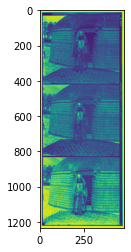

In [91]:
image_name='00087u.jpg'

img=cv2.imread(image_name)
gimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)#I turned gray for shape method. I only need width and height.
gimg=np.asarray(gimg) #I wanted to use like an array for cropping and the other calculations
print(img.shape)
print(gimg.shape)
plt.imshow(gimg)



1174 420


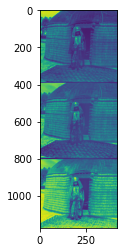

In [92]:

y=30
x=30 #I assigned this randomly.
height,width=gimg.shape
gimg = gimg[y:height-y, x:width-x] #This is a classical cropping method
height,width=gimg.shape
print(height,width)
plt.imshow(gimg)


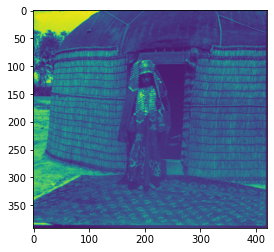

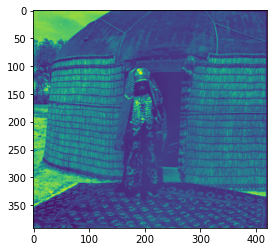

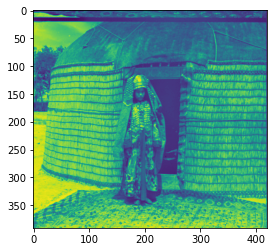

In [93]:
rgb_height=int(height/3)#I divided to image 3 different parts. int function is used for getting rid of comma 
blue=gimg[0:rgb_height,:]  #First part is blue
green=gimg[rgb_height:2*rgb_height,:] #second part is green
red=gimg[2*rgb_height:3*rgb_height,:]#third part is red. It is not normal sequence so I did not use split function.
plt.figure()
plt.imshow(blue)
plt.figure()
plt.imshow(green)
plt.figure()
plt.imshow(red)

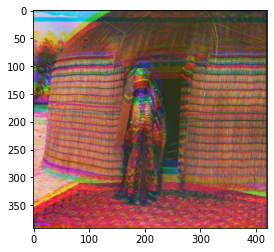

In [94]:
unaligned_result=(np.dstack((red,green,blue))).astype(np.uint8)
cv2.imwrite("unalignedferp.jpg", unaligned_result)
cv2.waitKey(0)
cv2.destroyAllWindows()
plt.figure()
plt.imshow(unaligned_result)

In [95]:
def ncc(a1,a2):
    a1=a1-a1.mean()
    a2=a2-a2.mean()
    return np.sum(((a1/np.sqrt(np.sum(np.square(a1)))) * (a2/np.sqrt(np.sum(np.square(a2))))))

def alignNCC(a1, allign_a1,travel):
    min_limit = -1 #I assigned that for control. It is a min limit for loop.
    value=np.linspace(-travel,travel,travel+1,dtype=int) #This section for travelling all pixels.  linspace() is a method in numpy library.
    #I give x and y coordinates and it is keep producing number between this coordinates.
    for x in value:
        for y in value:
            ncc_value = ncc(a1,np.roll(allign_a1,[x,y],axis=(0,1)))
            if ncc_value > min_limit:
                min_limit = ncc_value
                output = [x,y]
    return output
greenBlue = alignNCC(blue,green,30)
redBlue = alignNCC(blue,red,30)

print("GreenNCC:",greenBlue)
print("RedNCC:", redBlue)


allignGreen=np.roll(green,greenBlue,axis=(0,1)) #This is for rolling the images green to value in given axis.
allignRed=np.roll(red,redBlue,axis=(0,1))

allignPhoto_ncc = (np.dstack((allignRed,allignGreen,blue))).astype(np.uint8)






GreenNCC: [-14, 6]
RedNCC: [-26, 8]


GreenNCC: [-14, 6]
RedNCC: [-26, 8]


<Figure size 432x288 with 0 Axes>

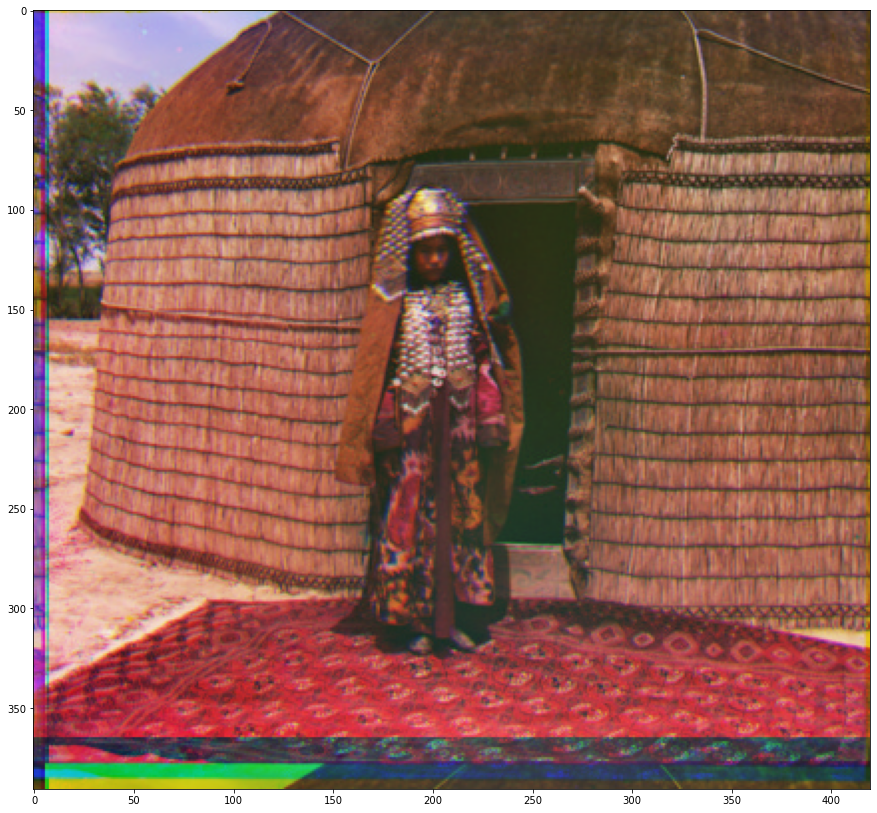

In [96]:
print("GreenNCC:",greenBlue)
print("RedNCC:", redBlue)

plt.figure()
plt.figure(figsize=(15,15))
plt.imshow(allignPhoto_ncc)